In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Convolution2D, Flatten, MaxPooling2D
from keras.utils import np_utils

Using Theano backend.


ImportError: cannot import name gof

In [30]:
ds = pd.read_csv('./train.csv')
data = ds.values
X_data = data[:10000, 1:]
y_data = data[:10000, 0]
print X_data.shape, y_data.shape

(10000, 784) (10000,)


In [31]:
X_data = X_data/255.0
y = np_utils.to_categorical(y_data)
print X_data.shape, y.shape

(10000, 784) (10000, 10)


In [32]:
split = int(0.85*X_data.shape[0])

X_train = X_data[:split]
y_train = y[:split]
X_test = X_data[split:]
y_test = y[split:]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(8500, 784) (8500, 10)
(1500, 784) (1500, 10)


In [76]:
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adagrad',
              metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_17 (Dense)                 (None, 512)           401920      dense_input_9[0][0]              
____________________________________________________________________________________________________
activation_17 (Activation)       (None, 512)           0           dense_17[0][0]                   
____________________________________________________________________________________________________
dense_18 (Dense)                 (None, 10)            5130        activation_17[0][0]              
____________________________________________________________________________________________________
activation_18 (Activation)       (None, 10)            0           dense_18[0][0]                   
Total params: 407050
______________________________________________________________________

In [74]:
print X_train.mean()

0.131456636772


In [75]:
hist = model.fit(X_train, y_train,
         nb_epoch=10,
         shuffle=True,
         batch_size=256,
         validation_data=(X_test, y_test))

Train on 8500 samples, validate on 1500 samples
Epoch 1/10
8500/8500 [==============================] - 1s - loss: 0.6970 - acc: 0.8027 - val_loss: 0.4138 - val_acc: 0.8620
Epoch 2/10
8500/8500 [==============================] - 1s - loss: 0.2629 - acc: 0.9240 - val_loss: 0.2425 - val_acc: 0.9347
Epoch 3/10
8500/8500 [==============================] - 1s - loss: 0.2013 - acc: 0.9452 - val_loss: 0.2342 - val_acc: 0.9213
Epoch 4/10
8500/8500 [==============================] - 1s - loss: 0.1638 - acc: 0.9560 - val_loss: 0.1964 - val_acc: 0.9427
Epoch 5/10
8500/8500 [==============================] - 1s - loss: 0.1382 - acc: 0.9658 - val_loss: 0.1904 - val_acc: 0.9407
Epoch 6/10
8500/8500 [==============================] - 1s - loss: 0.1214 - acc: 0.9700 - val_loss: 0.1744 - val_acc: 0.9453
Epoch 7/10
8500/8500 [==============================] - 1s - loss: 0.1055 - acc: 0.9748 - val_loss: 0.1756 - val_acc: 0.9460
Epoch 8/10
8500/8500 [==============================] - 1s - loss: 0.0943 - a

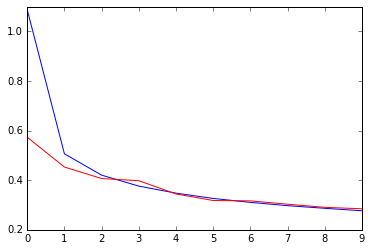

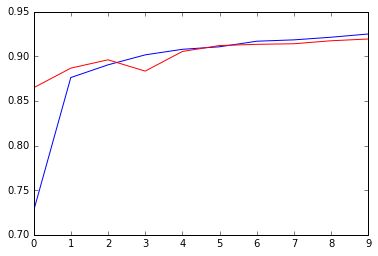

In [71]:
plt.figure(0)
plt.plot(hist.history['loss'], 'b')
plt.plot(hist.history['val_loss'], 'r')

plt.figure(1)
plt.plot(hist.history['acc'], 'b')
plt.plot(hist.history['val_acc'], 'r')

plt.show()

In [87]:
out = model.predict(X_test)
print out.shape

(1500, 10)


In [89]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(8500, 28, 28, 1) (1500, 28, 28, 1)
(8500, 10) (1500, 10)


In [90]:
conv_model = Sequential()


conv_model.add(Convolution2D(16, 3, 3, input_shape=(28, 28, 1)))
conv_model.add(Activation('relu'))
conv_model.add(Convolution2D(8, 3, 3, input_shape=(28, 28, 1)))
conv_model.add(Activation('relu'))

conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Convolution2D(4, 3, 3))
conv_model.add(Activation('relu'))

conv_model.add(Flatten())

conv_model.add(Dense(10))
conv_model.add(Activation('softmax'))

# conv_model.summary()
conv_model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

In [92]:
hist = conv_model.fit(X_train, y_train,
                     nb_epoch=20,
                     shuffle=True,
                      batch_size=128,
                     validation_data=(X_test, y_test))

Train on 8500 samples, validate on 1500 samples
Epoch 1/20
8500/8500 [==============================] - 11s - loss: 1.5566 - acc: 0.5473 - val_loss: 0.4791 - val_acc: 0.8533
Epoch 2/20
8500/8500 [==============================] - 11s - loss: 0.3667 - acc: 0.8908 - val_loss: 0.2804 - val_acc: 0.9153
Epoch 3/20
8500/8500 [==============================] - 11s - loss: 0.2533 - acc: 0.9260 - val_loss: 0.2155 - val_acc: 0.9373
Epoch 4/20
8500/8500 [==============================] - 12s - loss: 0.2065 - acc: 0.9385 - val_loss: 0.1992 - val_acc: 0.9447
Epoch 5/20
8500/8500 [==============================] - 11s - loss: 0.1817 - acc: 0.9459 - val_loss: 0.1706 - val_acc: 0.9480
Epoch 6/20
8500/8500 [==============================] - 12s - loss: 0.1605 - acc: 0.9511 - val_loss: 0.1516 - val_acc: 0.9533
Epoch 7/20
8500/8500 [==============================] - 11s - loss: 0.1428 - acc: 0.9566 - val_loss: 0.1394 - val_acc: 0.9627
Epoch 8/20
8500/8500 [==============================] - 11s - loss: 0.

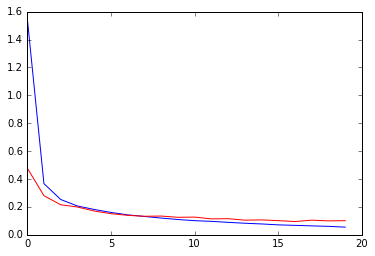

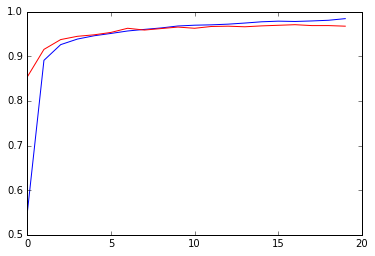

In [93]:
plt.figure(0)
plt.plot(hist.history['loss'], 'b')
plt.plot(hist.history['val_loss'], 'r')

plt.figure(1)
plt.plot(hist.history['acc'], 'b')
plt.plot(hist.history['val_acc'], 'r')

plt.show()